In [1]:
%run -i ch04.py

In [49]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxl')

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

from models import LinearRegressionModel
from pipelines import NumericPipeline
from const import PATH_SCREENSHOTS

In [3]:
theta = [4, 3]
count = 100
X, y = generate_data(theta, count)

In [4]:
theta = linear_fit(X, y)
theta

array([[4.2151],
       [2.7701]])

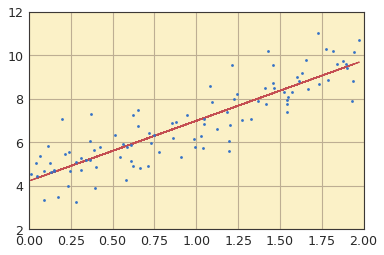

In [5]:
y_ = linear_predict(X, theta)
plt.plot(X, y_, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 2, 12])
plt.show()

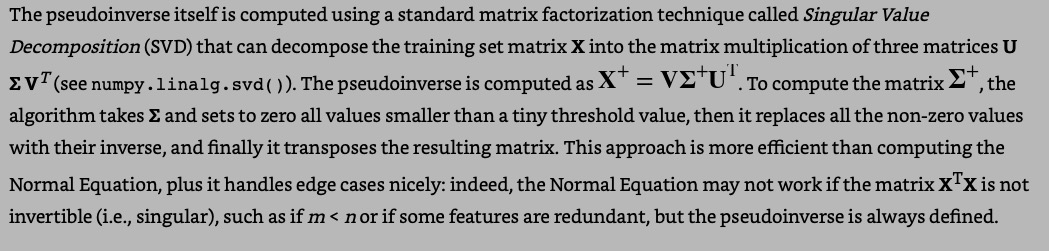

In [6]:
Image(f'{PATH_SCREENSHOTS}/ch04/svd_vs_ne.jpg', width=700)

<models.LinearRegressionModel object at 0x7f091eef5240>: LinearRegression,
size: 100, rmse: 0.90, mean: 0.90, std: 0.19,
theta: [4.2151, 2.7701], residuals: [80.6585], sigmas: [14.3702, 4.1196]


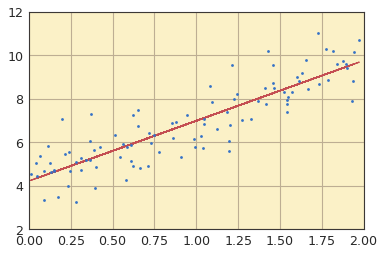

In [7]:
lr = LinearRegressionModel(LinearRegression)
lr.evaluate(X, y)
print(repr(lr))

plt.plot(X, lr.predictions, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 2, 12])
plt.show()

In [8]:
frame = pd.DataFrame(X)
X_ = NumericPipeline(frame).fit_transform(frame)

<models.LinearRegressionModel object at 0x7f091d668400>: LinearRegression,
size: 100, rmse: 0.90, mean: 0.90, std: 0.19,
theta: [6.8200, 1.6399], residuals: [80.6585], sigmas: [10.0000, 10.0000]


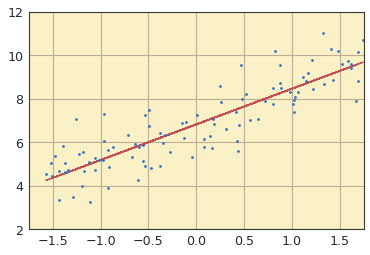

In [9]:
lrs = LinearRegressionModel(LinearRegression)
lrs.evaluate(*(X_, y))
print(repr(lrs))

plt.plot(X_, lrs.predictions, 'r-')
plt.plot(X_, y, 'b.')
plt.axis([-1.75, 1.75, 2, 12])
plt.show()

In [10]:
index = np.array(range(10)) * 10 + 1
pred = lr.model.predict(X[index])
pred_ = lrs.model.predict(X_[index])
import math
view = np.c_[
    X[index], y[index], pred.round(4), 
    X_[index], y[index], pred_.round(4)
]
frame = pd.DataFrame(view)
frame.index = index
frame.columns = ['X', 'y', 'Pred', 'X_', 'y', 'Pred_']
frame

,X,y,Pred,X_,y,Pred_
1,1.901429,9.405278,9.4823,1.623434,9.405278,9.4823
11,1.939820,10.148210,9.5886,1.688284,10.148210,9.5886
21,0.278988,5.098018,4.9879,-1.117192,5.098018,4.9879
31,0.341048,5.197723,5.1598,-1.012360,5.197723,5.1598
41,0.990354,5.802383,6.9585,0.084447,5.802383,6.9585
51,1.550266,8.084499,8.5095,1.030250,8.084499,8.5095
61,0.542698,5.306033,5.7184,-0.671733,5.306033,5.7184
71,0.397431,3.871837,5.3160,-0.917117,3.871837,5.3160
81,1.246596,8.213622,7.6683,0.517292,8.213622,7.6683
91,1.426490,10.176262,8.1666,0.821167,10.176262,8.1666


In [11]:
theta_ne = linear_fit(X, y, algo=METHOD_NE)
theta_svd = linear_fit(X, y, algo=METHOD_SVD)
theta_bgd, path_bgd = linear_fit(X, y, algo=METHOD_BGD, tolerance=0.001)
theta_sgd, path_sgd = linear_fit(X, y, algo=METHOD_SGD, epochs=50, lr=0.1)
theta_mbgd, path_mbgd = linear_fit(X, y, algo=METHOD_MBGD, batch=10)

array = np.array([
    theta_ne.flatten(), 
    theta_svd.flatten(), 
    theta_bgd.flatten(), 
    theta_sgd.flatten(), 
    theta_mbgd.flatten()
]).T
frame = pd.DataFrame(array)
frame.columns = ['ne', 'svd', 'bgd', 'sgd', 'mbgd']
frame

,ne,svd,bgd,sgd,mbgd
0,4.215096,4.215096,4.212992,4.128694,4.256427
1,2.770113,2.770113,2.771971,2.688538,2.798984


In [12]:
lr = LinearRegressionModel(SGDRegressor, max_iter=1000, tol=1e-3)
lr.evaluate(X, y.ravel())
print(repr(lr))

<models.LinearRegressionModel object at 0x7f091eef59e8>: SGDRegressor,
size: 100, rmse: 0.92, mean: 0.92, std: 0.21,
theta: [4.2151, 2.7701], residuals: [80.6585], sigmas: [14.3702, 4.1196]


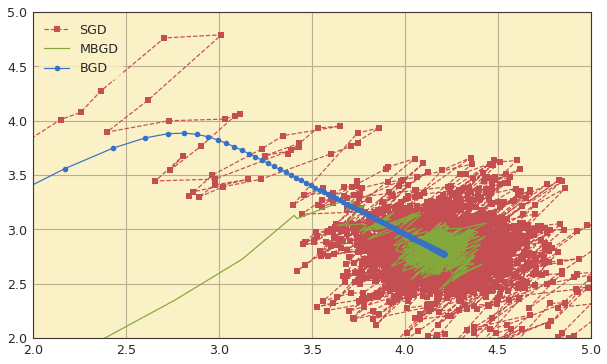

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(path_sgd[:,0], path_sgd[:,1], 'rs--', label='SGD')
plt.plot(path_mbgd[:,0], path_mbgd[:,1], 'g-', label='MBGD')
plt.plot(path_bgd[:,0], path_bgd[:,1], 'bo-', label='BGD')
plt.axis([2, 5, 2, 5])
plt.legend(loc='upper left')
plt.show()

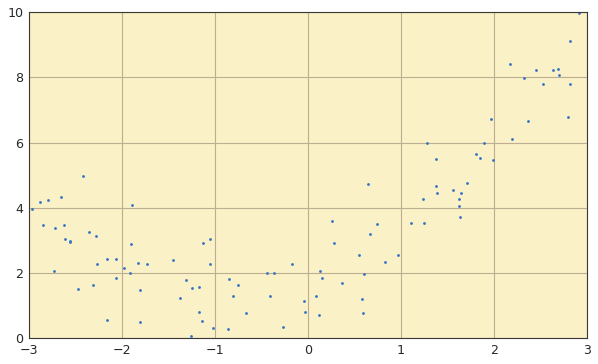

In [14]:
X, y = generate_data([2, 1, 0.5], v=6, u=-3)

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_ = poly.fit_transform(X)

theta_ne = linear_fit(X_, y, algo=METHOD_NE)
theta_svd = linear_fit(X_, y, algo=METHOD_SVD)
theta_bgd, path_bgd = linear_fit(X_, y, algo=METHOD_BGD, tolerance=0.001)
theta_sgd, path_sgd = linear_fit(X_, y, algo=METHOD_SGD, epochs=50, lr=0.1)
theta_mbgd, path_mbgd = linear_fit(X_, y, algo=METHOD_MBGD, batch=10)


array = np.array([
    theta_ne.flatten(), 
    theta_svd.flatten(), 
    theta_bgd.flatten(), 
    theta_sgd.flatten(), 
    theta_mbgd.flatten()
]).T
frame = pd.DataFrame(array)
frame.columns = ['ne', 'svd', 'bgd', 'sgd', 'mbgd']
frame

ch04.py:75: RuntimeWarning: invalid value encountered in subtract
  theta = theta - incrs


,ne,svd,bgd,sgd,mbgd
0,1.781346,1.781346,NaN,-7.192998e+286,-6.604096e+303
1,0.933669,0.933669,NaN,-2.831011e+284,1.055141e+304
2,0.564563,0.564563,NaN,1.649836e+286,-2.858583e+304


<models.LinearRegressionModel object at 0x7f091d6004a8>: LinearRegression,
size: 100, rmse: 0.88, mean: 0.89, std: 0.22,
theta: [1.7813, 0.9337, 0.5646], residuals: [77.7194], sigmas: [42.3841, 17.6247, 6.3131]


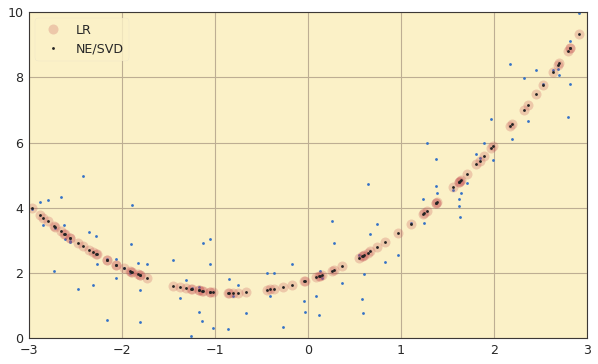

In [16]:
y_ne = linear_predict(X_, theta_ne)
y_svd = linear_predict(X_, theta_svd)

lr = LinearRegressionModel(LinearRegression)
lr.evaluate(X_, y)
print(repr(lr))

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.')
plt.plot(X, lr.predictions, 'o', markersize=10, color='r', alpha=0.25, label='LR')
plt.plot(X, y_ne, 'k.', label='NE/SVD')
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.show()

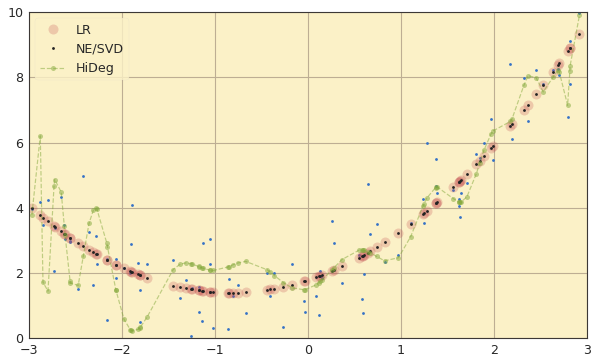

In [17]:
poly = PolynomialFeatures(degree=30, include_bias=False)
X__ = poly.fit_transform(X)

lr_ = LinearRegressionModel(LinearRegression)
lr_.evaluate(X__, y)

Xs, ys = zip(*sorted(zip(X, lr_.predictions)))

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.')
plt.plot(X, lr.predictions, 'o', markersize=10, color='r', alpha=0.25, label='LR')
plt.plot(X, y_ne, 'k.', label='NE/SVD')
plt.plot(Xs, ys, 'o--', markersize=5, color='g', alpha=0.5, label='HiDeg')
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.show()

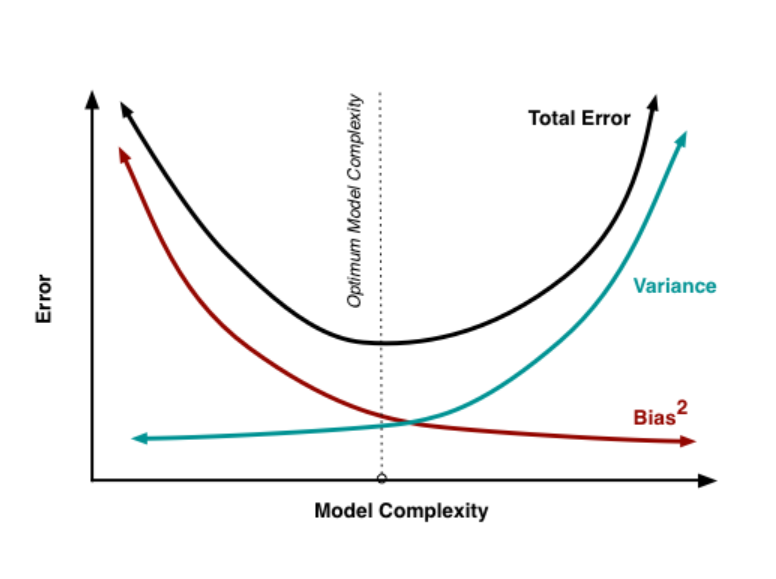

In [18]:
def plot_lc(et, ev, title):
    plt.plot(et, "r-", linewidth=2, label="train")
    plt.plot(ev, "b--", linewidth=1, label=" val")
    
    plt.title(title)
    plt.legend(loc="lower right")
    plt.axis([0, len(X) * 0.8, 0, 3])

def plot_lcs(et, ev, et_, ev_, et__, ev__):
    plt.figure(figsize=(12, 9))
    
    plt.subplot(221)
    plot_lc(et, ev, 'Bias / Underfit')
    plt.subplot(222)
    plot_lc(et_, ev_, 'Optimal')
    plt.subplot(223)
    plot_lc(et__, ev__, 'Variance / Overfit')
    
    plt.show()
    
Image(f'{PATH_SCREENSHOTS}/ch04/bias_var.png', width=500)

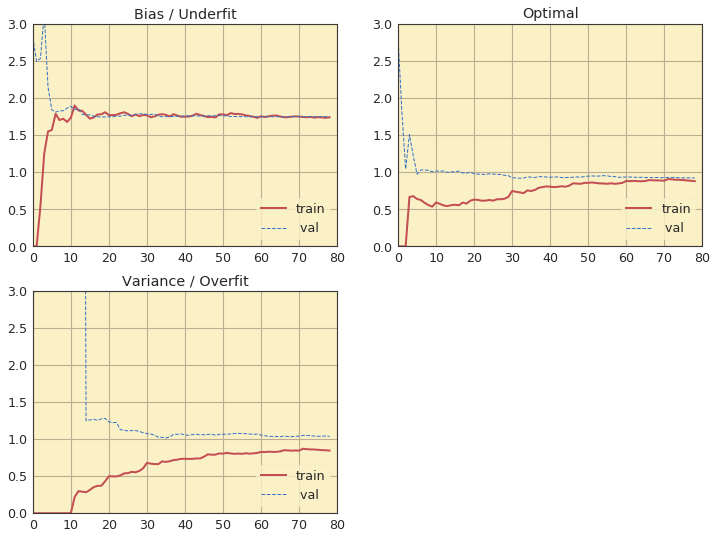

In [19]:
X, y = generate_data([2, 1, 0.5], v=6, u=-3)

et, ev = learning_curves_2(X, y)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_ = poly.fit_transform(X)
et_, ev_ = learning_curves_2(X_, y)

poly = PolynomialFeatures(degree=10, include_bias=False)
X__ = poly.fit_transform(X)
et__, ev__ = learning_curves_2(X__, y)

plot_lcs(et, ev, et_, ev_, et__, ev__)

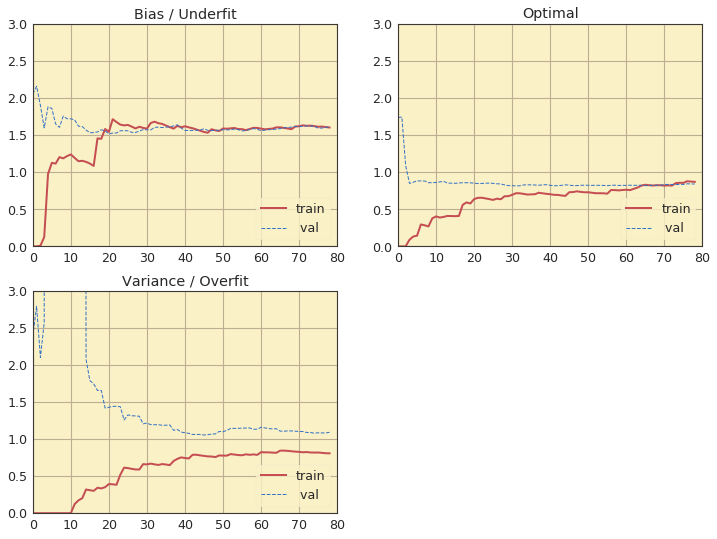

In [20]:
X, y = generate_data([2, 1, 0.5], v=6, u=-3)

et, ev = learning_curves(X, y, n=5, aggr='min')

poly = PolynomialFeatures(degree=2, include_bias=False)
X_ = poly.fit_transform(X)
et_, ev_ = learning_curves(X_, y, n=5, aggr='min')

poly = PolynomialFeatures(degree=10, include_bias=False)
X__ = poly.fit_transform(X)
et__, ev__ = learning_curves(X__, y, n=5, aggr='min', rs=10)

plot_lcs(et, ev, et_, ev_, et__, ev__)

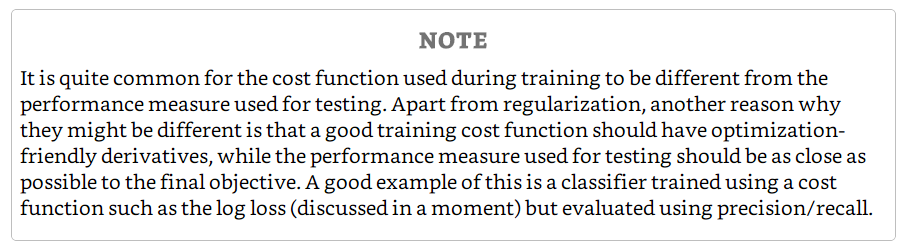

In [21]:
Image(f'{PATH_SCREENSHOTS}/ch04/cost_train_test.png', width=600)

(100, 1) (100, 1)


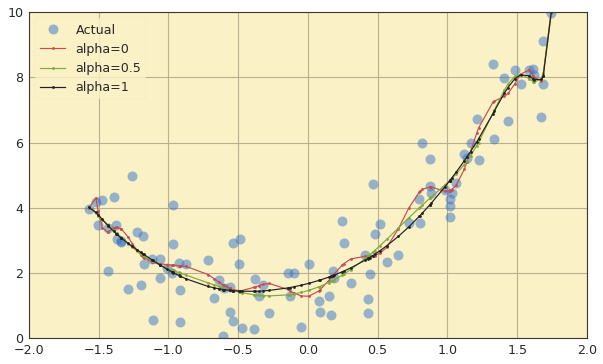

In [69]:
X, y = generate_data([2, 1, 0.5], v=6, u=-3)
print(X.shape, y.shape)

frame = pd.DataFrame(X)
X = NumericPipeline(frame).fit_transform(frame)

poly = PolynomialFeatures(degree=20, include_bias=False)
X_ = poly.fit_transform(X)

theta_ = linear_fit(X_, y, algo=METHOD_NE)
theta__ = linear_fit(X_, y, algo=METHOD_NE, alpha=0.05)
theta___ = linear_fit(X_, y, algo=METHOD_NE, alpha=1.0)

y_ = linear_predict(X_, theta_)
y__ = linear_predict(X_, theta__)
y___ = linear_predict(X_, theta___)

Xs, ys = zip(*sorted(zip(X, y_)))
Xs, ys_ = zip(*sorted(zip(X, y__)))
Xs, ys__ = zip(*sorted(zip(X, y___)))

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', markersize=10, color='b', alpha=0.5, label="Actual")

plt.plot(Xs, ys, 'r.-', label='alpha=0')
plt.plot(Xs, ys_, 'g.-', label='alpha=0.5')
plt.plot(Xs, ys__, 'k.-', label='alpha=1')

plt.legend(loc='upper left')
plt.axis([-2, 2, 0, 10])
plt.show()

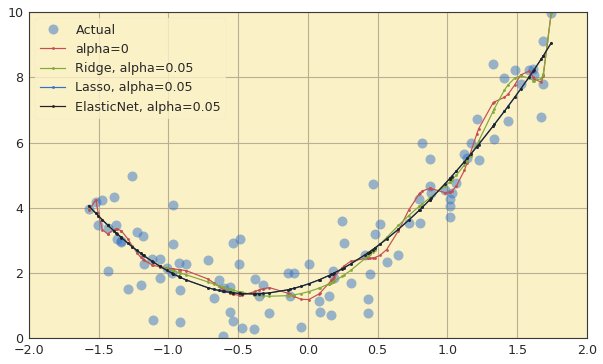

In [70]:
rr = LinearRegressionModel(LinearRegression)
rr_ = LinearRegressionModel(Ridge, tol=1, alpha=0.01)
rr__ = LinearRegressionModel(Lasso, tol=1, alpha=0.01)
rr___ = LinearRegressionModel(ElasticNet, tol=1, alpha=0.01, l1_ratio=0.5)

rr.evaluate(X_, y)
rr_.evaluate(X_, y)
rr__.evaluate(X_, y)
rr___.evaluate(X_, y)

Xs, ys = zip(*sorted(zip(X, rr.predictions)))
Xs, ys_ = zip(*sorted(zip(X, rr_.predictions)))
Xs, ys__ = zip(*sorted(zip(X, rr__.predictions)))
Xs, ys___ = zip(*sorted(zip(X, rr___.predictions)))

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', markersize=10, color='b', alpha=0.5, label="Actual")

plt.plot(Xs, ys, 'r.-', label='alpha=0')
plt.plot(Xs, ys_, 'g.-', label='Ridge, alpha=0.05')
plt.plot(Xs, ys__, 'b.-', label='Lasso, alpha=0.05')
plt.plot(Xs, ys___, 'k.-', label='ElasticNet, alpha=0.05')

plt.legend(loc='upper left')
plt.axis([-2, 2, 0, 10])
plt.show()
